In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
import scipy.stats
import numpy as np
from astropy import units as u
from astropy import constants as c

In [3]:
homedir = os.getenv("HOME")
gitdir = homedir+'/github/Virgo/'

# Read in Kennicutt Halpha Filters #

Rob has a Halphalow and Halphahigh filters.  Got transmission curves from 

http://mogit.as.arizona.edu/90prime_files/Documents/filters/90Prime_filter_tracings/Halpha%20filters.txt

File has transmission for zero deg angle of incidence and 10 deg incidence.


Saved files in ~/github/Virgo/observing/

In [5]:
filepath = gitdir+'observing/'
halow_zero = filepath+'halphalow-zerodeg.txt'
halow_ten = filepath+'halphalow-tendeg.txt'
hahigh_zero = filepath+'halphahigh-zerodeg.txt'
hahigh_ten = filepath+'halphahigh-tendeg.txt'

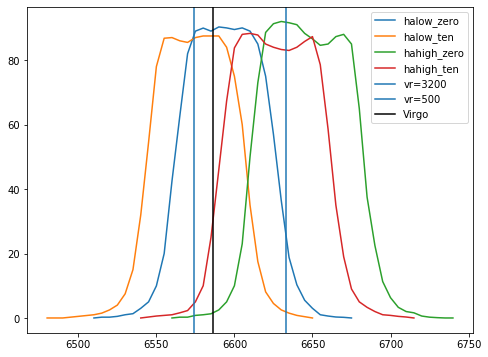

In [57]:
filters = [halow_zero,halow_ten,hahigh_zero,hahigh_ten]
filter_names = ['halow_zero','halow_ten','hahigh_zero','hahigh_ten']
plt.figure(figsize=(8,6))
for i in range(len(filters)):
    d = ascii.read(filters[i])
    plt.plot(d['col1'],d['col2'],label=filter_names[i])


# add virgo
# recession velocity ~ VC = 1050+/-35km s^-1^ from 
#  Binggeli, B.; Popescu, C. C.; Tammann, G. A.
# https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..275B/abstract
# 
# assume a velocity disp of 1000 km/s

lambda_0 = 6563. # angstrom
vcenter = 1050#*u.km/u.s
width = 1000#*u.km/u.s
zcenter = vcenter/3.e5
lambda_obs_center = lambda_0*(1+zcenter)

vmin = vcenter - 0.5*width
zmin = vmin/3.e5
lambda_obs_min = lambda_0*(1+zmin)

vmax = vcenter + 0.5*width
zmax = vmax/3.e5
lambda_obs_max = lambda_0*(1+zmax)

mean = lambda_obs_center 
std = lambda_obs_max - lambda_obs_min

plt.axvline(x=lambda_0*(3200./3.e5+1),label='vr=3200')
plt.axvline(x=lambda_0*(500./3.e5+1),label='vr=500')

plt.axvline(x=lambda_obs_center,ls='-',color='k',label='Virgo')
#plt.axvline(x=lambda_obs_min,ls='--',color='k')
#plt.axvline(x=lambda_obs_max,ls='--',color='k')

plt.legend()

#x_min = 6500
#x_max = 6750
##plt.figure()
#x = np.linspace(x_min, x_max, 100)
#y = scipy.stats.norm.pdf(x,mean,std)
#plt.plot(x,4000*y,'k-',label='Virgo cluster')

